In [52]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Allows plots to appear directly in the notebook.
%matplotlib inline

# Read csv file into a dataframe.
df = pd.read_csv('regression_data.csv')
df

,timestamp,DOW,HOUR,rain_in_mm,address,avg_avail_bikes
0,28/03/2018 06:24,Wednesday,6,20,Barrow Street,28
1,28/03/2018 07:24,Wednesday,7,0,Barrow Street,24
2,28/03/2018 08:24,Wednesday,8,0,Barrow Street,23
3,28/03/2018 09:24,Wednesday,9,0,Barrow Street,12
4,28/03/2018 10:24,Wednesday,10,0,Barrow Street,10
5,28/03/2018 11:24,Wednesday,11,20,Barrow Street,4
6,28/03/2018 12:24,Wednesday,12,0,Barrow Street,12
7,28/03/2018 13:24,Wednesday,13,0,Barrow Street,8
8,28/03/2018 14:24,Wednesday,14,0,Barrow Street,10
9,28/03/2018 15:24,Wednesday,15,0,Barrow Street,19


In [53]:
df.avg_avail_bikes.mean()

25.91269841269841

In [54]:
df.dtypes

timestamp          object
DOW                object
HOUR                int64
rain_in_mm          int64
address            object
avg_avail_bikes     int64
dtype: object

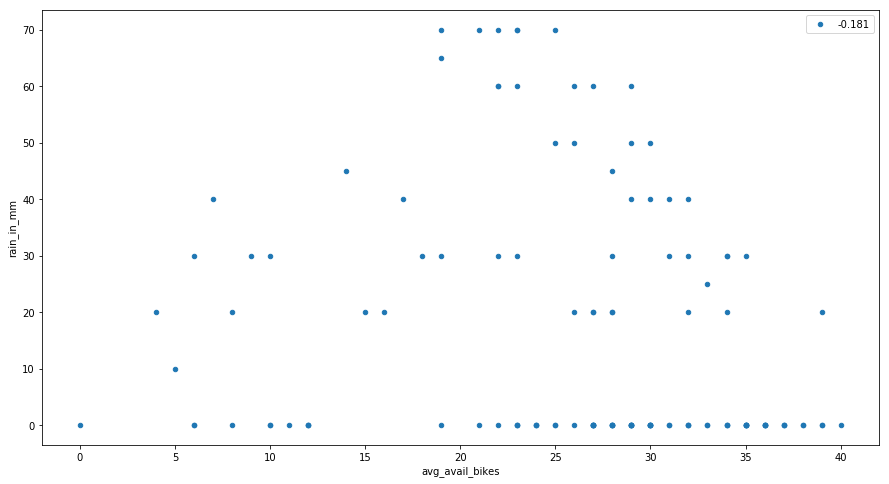

In [55]:
df.plot(kind='scatter', x='avg_avail_bikes', y='rain_in_mm', label="%.3f" % df[['rain_in_mm', 'avg_avail_bikes']].corr().as_matrix()[0,1], figsize=(15, 8))


In [56]:
# Add dummies to the other continuous features
X = df[['HOUR','rain_in_mm']]


y = df.avg_avail_bikes
print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

Descriptive features:
      HOUR  rain_in_mm
0       6          20
1       7           0
2       8           0
3       9           0
4      10           0
5      11          20
6      12           0
7      13           0
8      14           0
9      15           0
10     16          30
11     17           0
12     18           0
13     19           0
14     20          30
15     21           0
16     22           0
17     23           0
18      6           0
19      7           0
20      8           0
21      9           0
22     10           0
23     11          10
24     12          30
25     13          30
26     14          45
27     15          40
28     16          30
29     17          30
..    ...         ...
96     12          70
97     13          70
98     14          60
99     15          60
100    16          60
101    17          50
102    18          40
103    19           0
104    20           0
105    21          40
106    22          50
107    23          60
108     6

In [57]:
# Train a classification tree with max_depth=3 on all data.
dtc = DecisionTreeClassifier(max_depth=3, random_state=1)
dtc.fit(X, y)
print(dtc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')


In [58]:
# Check the type of this object
type(dtc)

sklearn.tree.tree.DecisionTreeClassifier

In [59]:
# Compute the importance of each feature based on the trained decision tree classifier
pd.DataFrame({'feature': X.columns, 'importance': dtc.feature_importances_})

,feature,importance
0,HOUR,0.714251
1,rain_in_mm,0.285749


In [60]:
# Alternative to print a tree in text format
"""
treeviz.py

A simple tree visualizer for sklearn DecisionTreeClassifiers.

Written by Lutz Hamel, (c) 2017 - Univeristy of Rhode Island
"""
import operator

def tree_print(clf, X):
    """
    Print the tree of a sklearn DecisionTreeClassifier

    Parameters
    ----------
    clf : DecisionTreeClassifier - A tree that has already been fit.
    X : The original training set
    """
    tlevel = _tree_rprint('', clf, X.columns, clf.classes_)
    print('<',end='')
    for i in range(3*tlevel - 2):
        print('-',end='')
    print('>')
    print('Tree Depth: ',tlevel)

def _tree_rprint(kword, clf, features, labels, node_index=0, tlevel_index=0):
    # Note: The DecisionTreeClassifier uses the Tree structure defined in:
    # 		github.com/scikit-learn/scikit-learn/blob/master/sklearn/tree/_tree.pyx
    #       it is an array based tree implementation:

    # indent the nodes according to their tree level
    for i in range(tlevel_index):
        print('  |',end='')

	#  TODO: the following should use the TREE_LEAF constant defined in _tree.pyx
	#        instead of -1, not quite sure how to get at it from the tree user level
    if clf.tree_.children_left[node_index] == -1:  # indicates leaf
        print(kword, end=' ' if kword else '')
        # get the majority label
        count_list = clf.tree_.value[node_index, 0]
        max_index, max_value = max(enumerate(count_list), key=operator.itemgetter(1))
        max_label = labels[max_index]
        print(max_label)
        return tlevel_index
    
    else:
        # compute and print node label
        feature = features[clf.tree_.feature[node_index]]
        threshold = clf.tree_.threshold[node_index]
        print(kword, end=' ' if kword else '')
        print('if {} =< {}: '.format(feature, threshold))
        # recurse down the children
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        ltlevel_index = _tree_rprint('then', clf, features, labels, left_index, tlevel_index+1)
        rtlevel_index = _tree_rprint('else', clf, features, labels, right_index, tlevel_index+1)
        # return the maximum depth of either one of the children
        return max(ltlevel_index,rtlevel_index)

In [61]:
# Use the function tree_print defined above to plot a decision tree in text format
tree_print(dtc, X)

if HOUR =< 19.5: 
  |then if rain_in_mm =< 55.0: 
  |  |then if HOUR =< 7.5: 
  |  |  |then 24
  |  |  |else 27
  |  |else if HOUR =< 7.5: 
  |  |  |then 23
  |  |  |else 22
  |else if rain_in_mm =< 47.5: 
  |  |then if HOUR =< 20.5: 
  |  |  |then 28
  |  |  |else 29
  |  |else if HOUR =< 21.5: 
  |  |  |then 25
  |  |  |else 26
<------->
Tree Depth:  3


In [62]:
predictions = dtc.predict(X)
df_true_vs_predicted = pd.DataFrame({'Actual_bike_numbers': df.avg_avail_bikes, 'Predicted_bike_numbers': predictions})
df_true_vs_predicted

,Actual_bike_numbers,Predicted_bike_numbers
0,28,24
1,24,24
2,23,27
3,12,27
4,10,27
5,4,27
6,12,27
7,8,27
8,10,27
9,19,27


In [63]:
#print("Accuracy: ", metrics.accuracy_score(y, predictions))
#print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
#print("Classification report:\n ", metrics.classification_report(y, predictions))
print(metrics.mean_absolute_error(y, predictions))

6.27777777778


In [64]:
scores = cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=1), X, y, scoring='mean_absolute_error', cv=3)
print(scores)
print(scores.mean())

[-7.69642857 -6.86842105 -6.875     ]
-7.14661654135


In [65]:
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)

In [66]:
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [67]:
rfc_predictions = rfc.predict(X)
df_true_vs_rfc_predicted = pd.DataFrame({'ActualClass': y, 'PredictedClass': rfc_predictions})
df_true_vs_rfc_predicted

,ActualClass,PredictedClass
0,28,28
1,24,24
2,23,23
3,12,12
4,10,6
5,4,28
6,12,12
7,8,35
8,10,35
9,19,19


In [68]:
print(metrics.mean_absolute_error(y, rfc_predictions))

4.35714285714


In [69]:
# This process is repeated 3 times. More details about cross-validation here: http://www-bcf.usc.edu/~gareth/ISL/
scores = cross_val_score(RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1), X, y, scoring='mean_absolute_error', cv=3)
print(scores)
print(scores.mean())

[-7.71428571 -9.36842105 -6.5       ]
-7.86090225564


In [70]:
rfc.oob_score_

0.1111111111111111

In [ ]:
# X is hour and mm_rain
# rfc.predict(X) is the estimated number of bikes